<a href="https://colab.research.google.com/github/casualcomputer/accounting_fraud/blob/master/rnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sqldf

In [3]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/casualcomputer/accounting_fraud/master/uscecchini28.csv"
df = pd.read_csv(data_url, error_bad_lines=False)

print(df.head())


   fyear  gvkey    sich  insbnk  ...       dpi      reoa      EBIT    ch_fcf
0   1990   1009  3460.0       0  ...  0.873555  0.167620  0.161961 -0.042140
1   1990   1011  4841.0       0  ...  0.745139 -0.428957 -0.157888  0.100228
2   1990   1017  3812.0       0  ...  1.015131  0.394768  0.063681  0.066348
3   1990   1021  3861.0       0  ...  1.026261  0.094822  0.088347 -0.017358
4   1990   1028  7385.0       0  ...  0.598443 -0.942379 -0.700821  0.130349

[5 rows x 51 columns]


In [5]:
# different companies
list(df['gvkey'].unique())[0:10]

[1009, 1011, 1017, 1021, 1028, 1034, 1036, 1043, 1045, 1050]

In [3]:
start_year = df['fyear'].min()
end_year = df['fyear'].max()

print(start_year, end_year)

1990 2014


In [6]:
company1234 = df[df['gvkey']==1234]
company1234 = company1234[['fyear', 'act']]
company1234

,fyear,act
57,1990,16.531
4639,1991,21.123
9343,1992,23.232
14307,1993,23.520
19684,1994,12.666
31595,1996,24.323
51840,1999,18.702
65418,2001,20.678
95621,2006,30.658
101526,2007,32.609


In [11]:
import sqldf 
henry_df =df[['gvkey','fyear']]
henry_df['file_ind'] = 1
henry_df 

"""
def cartesian_product_basic(left, right):
    return (
       left.assign(key=1).merge(right.assign(key=1), on='key').drop('key', 1))

cartesian_product_basic(henry_df, henry_df)
"""

company = df[df['gvkey']==1004]
print(company)
q = """
SELECT y.gvkey, x.fyear,y.file_ind
FROM henry_df AS x
CROSS JOIN henry_df as y
ON x.file_ind = y.file_ind
WHERE x.fyear >= y.fyear AND x.gvkey = y.gvkey
ORDER BY y.gvkey, x.fyear asc
"""

sqldf.run(q)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


        fyear  gvkey    sich  insbnk  ...       dpi      reoa      EBIT    ch_fcf
4582     1991   1004  5080.0       0  ...  0.968053  0.259703  0.055586 -0.020650
38301    1997   1004  5080.0       0  ...  1.002534  0.220100  0.097905 -0.094099
65386    2001   1004  5080.0       0  ...  0.810264  0.196569 -0.110435 -0.040463
71748    2002   1004  5080.0       0  ...  1.283581  0.180749  0.000071  0.086275
77815    2003   1004  5080.0       0  ...  1.012580  0.185938  0.028939  0.030194
83796    2004   1004  5080.0       0  ...  0.827183  0.194543  0.047713  0.002089
101501   2007   1004  5080.0       0  ...  0.965768  0.233614  0.100907 -0.051994
107369   2008   1004  5080.0       0  ...  0.804665  0.280107  0.098969 -0.040613
112981   2009   1004  5080.0       0  ...  1.359161  0.259580  0.061588 -0.107931
118348   2010   1004  5080.0       0  ...  0.838888  0.274390  0.079743 -0.049365
123737   2011   1004  5080.0       0  ...  0.829860  0.221612  0.059652 -0.013265
129141   2012   

,gvkey,fyear,file_ind
0,1004,1991,1
1,1004,1997,1
2,1004,1997,1
3,1004,2001,1
4,1004,2001,1
...,...,...,...
1026093,316056,2013,1
1026094,316056,2014,1
1026095,316056,2014,1
1026096,317260,2014,1


In [4]:
# fill numerical missing values = 0
start_year = 1990
end_year = 2014


left_df = pd.DataFrame({'fyear': range(start_year, end_year+1)})
print(left_df)
#left_df_imputed_missing = left_df.merge(company1234, on='fyear', how='left')
#left_df_imputed_missing.loc[left_df_imputed_missing['act'].isnull(),'act'] = 0
  

    fyear
0    1990
1    1991
2    1992
3    1993
4    1994
5    1995
6    1996
7    1997
8    1998
9    1999
10   2000
11   2001
12   2002
13   2003
14   2004
15   2005
16   2006
17   2007
18   2008
19   2009
20   2010
21   2011
22   2012
23   2013
24   2014


In [ ]:
import numpy as np
# variable act for all companies
# fill numerical missing values = 0
start_year = 1990
end_year = 2014

var_act = df[['gvkey', 'fyear', 'act']]
left_df = pd.DataFrame({'fyear': range(start_year, end_year+1)})
#left_df_imputed_missing = left_df.merge(company1234, on='fyear', how='left')
#left_df_imputed_missing.loc[left_df_imputed_missing['act'].isnull(),'act'] = 0

# one hot encode missing years
years_one_hot = var_act.pivot(index='gvkey', columns='fyear', values='fyear')
#np.where((years_one_hot.isna()), 0, 1)
years_one_hot.mask(~(years_one_hot.isna()), 1, inplace=True)
years_one_hot.mask(years_one_hot.isna(), 0, inplace=True)
years_one_hot

# pivot numerical 

fyear,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
gvkey,,,,,,,,,,,,,,,,,,,,,,,,,
1004,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1009,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1011,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1013,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1014,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
315669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
316056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
var_act['fyear']

0         1990
1         1990
2         1990
3         1990
4         1990
          ... 
146040    2014
146041    2014
146042    2014
146043    2014
146044    2014
Name: fyear, Length: 146045, dtype: int64

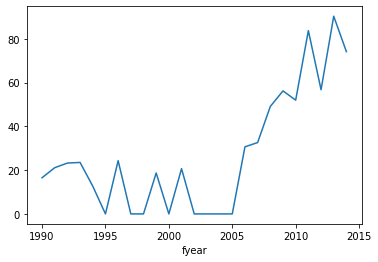

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
left_df_imputed_missing.set_index('fyear').plot(legend=False,ax=ax)

In [ ]:
import tsai
from tsai.all import *
dsid = 'LSST'
X, y, splits = get_UCR_data(dsid, split_data=False)

In [ ]:
X

memmap([[[ 1.7597e+01,  2.2974e-01, -2.9654e+01, ...,  1.1982e+02,
           9.1591e+01,  4.3719e+01],
         [ 8.1713e+00, -5.8956e+00, -2.1296e+01, ...,  2.1849e+02,
           1.0378e+02,  3.0689e+01],
         [-1.7842e+00,  1.6837e+01,  2.9103e+01, ...,  1.6398e+03,
           1.8238e+03,  9.5092e+02],
         [-1.9706e+01,  5.0390e+00, -4.7503e-01, ...,  5.9787e+02,
           1.2460e+03,  8.5927e+02],
         [-9.7135e+00,  2.4332e+00,  7.5391e+01, ...,  2.1922e+03,
           1.1301e+04,  8.1331e+03],
         [-6.1887e+01,  5.8914e+01,  1.0665e+01, ...,  1.8484e+01,
           7.5107e+02,  9.8883e+02]],

        [[ 2.4209e+00,  1.6847e+00,  5.0692e-01, ..., -1.5618e+01,
          -1.0702e+01, -4.6352e+00],
         [-5.6039e-01,  2.3989e+01,  5.0281e+01, ..., -7.4233e+00,
          -6.3568e+00, -3.2769e+00],
         [ 2.3654e+01,  1.7803e+01,  5.1196e+01, ...,  3.7833e+00,
          -4.6464e+00, -5.9048e+00],
         [-3.8171e+00, -1.9575e+01,  1.6036e+01, ...,  1.6565e

In [ ]:
y

memmap(['6', '6', '6', ..., '95', '95', '95'], dtype='<U2')

In [ ]:
X.shape

(4925, 6, 36)